In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 
import torch 
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split


In [4]:
file = pd.read_csv("Smart Earth Quake Detection/bhooj_earthquake_dataset.csv")
x = file.drop(["Target"],axis=1).values
y = file["Target"].values
# split the data into target(y) and features(x)

In [5]:
# define our scaler function for scalling from preprocessing
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

In [6]:
xt = x_scaler.fit_transform(x)
yt = y_scaler.fit_transform(y.reshape(-1,1))

In [7]:
x_train,x_test,y_train,y_test = train_test_split(xt,yt,test_size = 0.3,random_state=42)
# spliting the dat so we can evluate later on with unseen data

In [8]:
# converting to torch tensor
x_train = torch.tensor(x_train,dtype = torch.float32)
x_test = torch.tensor(x_test,dtype = torch.float32)
y_train = torch.tensor(y_train,dtype = torch.float32)
y_test = torch.tensor(y_test,dtype = torch.float32)
# converting to 3d - 2d
x_train = x_train.unsqueeze(-1)
x_test = x_test.unsqueeze(-1)

In [9]:
input_size = 1
hidden_size = 55
output_size = 1
num_layers = 5
model = torch.load("Smart Earth Quake Detection/LSTM_EarthQuake_model_v3.pth")
output_layer = nn.Linear(hidden_size,output_size)
optimizer = optim.Adam(list(model.parameters()) + list(output_layer.parameters()),lr=0.0001)
loss2 = np.zeros(200)
loss_fn = nn.MSELoss()


C:\Users\erobo\AppData\Local\Temp\ipykernel_33316\719608834.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load("Smart Earth Quake Detection/LSTM_EarthQua

In [10]:
for i in range(200):
    model.train()
    optimizer.zero_grad()
    output , hidden = model(x_train)
    preds = output_layer(output[:,-1,:])
    loss = loss_fn(preds,y_train)
    loss.backward()
    loss2[i] = loss.item()
    optimizer.step()
    print(f"MSE = {loss2[i]}")


MSE = 0.5265438556671143
MSE = 0.5173892974853516
MSE = 0.5084697008132935
MSE = 0.49976661801338196
MSE = 0.49125659465789795
MSE = 0.48291513323783875
MSE = 0.4747191369533539
MSE = 0.4666457176208496
MSE = 0.4586719572544098
MSE = 0.4507754147052765
MSE = 0.44293421506881714
MSE = 0.4351275563240051
MSE = 0.42733606696128845
MSE = 0.41954144835472107
MSE = 0.4117266535758972
MSE = 0.40387558937072754
MSE = 0.3959728479385376
MSE = 0.3880038857460022
MSE = 0.37995484471321106
MSE = 0.3718123137950897
MSE = 0.36356374621391296
MSE = 0.3551972210407257
MSE = 0.3467014729976654
MSE = 0.33806636929512024
MSE = 0.32928261160850525
MSE = 0.320342481136322
MSE = 0.31123974919319153
MSE = 0.3019702136516571
MSE = 0.29253193736076355
MSE = 0.28292590379714966
MSE = 0.273156076669693
MSE = 0.2632300555706024
MSE = 0.2531593143939972
MSE = 0.24295951426029205
MSE = 0.23265080153942108
MSE = 0.22225801646709442
MSE = 0.21181073784828186
MSE = 0.20134295523166656
MSE = 0.19089314341545105
MSE = 0

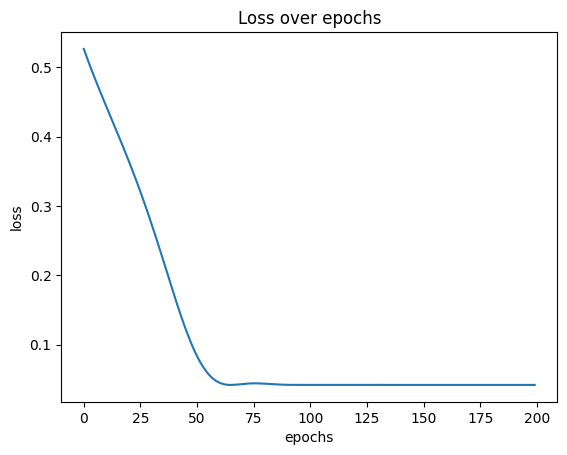

In [11]:
sns.lineplot(loss2)
plt.title("Loss over epochs")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [12]:
# put model in evaluation mode 
model.eval()

LSTM(1, 55, num_layers=5, batch_first=True)

In [13]:
for i in range(200):
    optimizer.zero_grad()
    output , hidden = model(x_test)
    preds = output_layer(output[:,-1,:])
    loss = loss_fn(preds,y_test)
    loss.backward()
    loss2[i] = loss.item()
    optimizer.step()
    print(f"MSE = {loss2[i]}")

MSE = 0.044491562992334366
MSE = 0.044491078704595566
MSE = 0.04449018836021423
MSE = 0.04448898136615753
MSE = 0.04448755085468292
MSE = 0.044486019760370255
MSE = 0.0444844625890255
MSE = 0.044482965022325516
MSE = 0.04448159411549568
MSE = 0.044480402022600174
MSE = 0.044479403644800186
MSE = 0.04447861760854721
MSE = 0.04447803646326065
MSE = 0.04447765275835991
MSE = 0.0444774255156517
MSE = 0.04447734355926514
MSE = 0.04447735473513603
MSE = 0.044477429240942
MSE = 0.04447753727436066
MSE = 0.04447764903306961
MSE = 0.04447774216532707
MSE = 0.04447780176997185
MSE = 0.04447782412171364
MSE = 0.04447779804468155
MSE = 0.04447771608829498
MSE = 0.04447759687900543
MSE = 0.0444774404168129
MSE = 0.044477254152297974
MSE = 0.04447704926133156
MSE = 0.044476840645074844
MSE = 0.04447662830352783
MSE = 0.04447643458843231
MSE = 0.04447624087333679
MSE = 0.04447607323527336
MSE = 0.04447592422366142
MSE = 0.04447579011321068
MSE = 0.044475674629211426
MSE = 0.04447557404637337
MSE = 0.

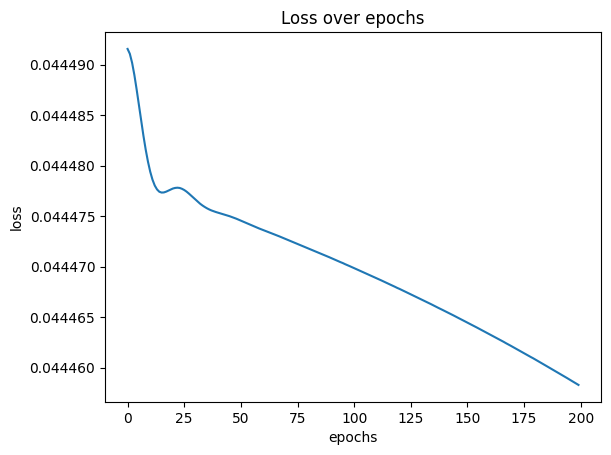

In [14]:
sns.lineplot(loss2)
plt.title("Loss over epochs")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()